# Regression problem

In [16]:
import numpy as np
import pandas as pd
houses=pd.read_csv(r"C:\Users\DELL\Downloads\California_Houses.csv")
print(houses)

       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Househol

# scaling and spliting the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
houses_scaled = scaler.fit_transform(houses)
houses_df = pd.DataFrame(houses_scaled, columns=houses.columns)
x = houses_df.drop(columns=['Median_House_Value'])
y = houses_df['Median_House_Value']
x_train_temp,x_test,y_train_temp,y_test=train_test_split(x,y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_temp,y_train_temp,test_size=0.15,random_state=42)

# Normal Form

In [18]:
theta_best=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print (theta_best)

[ 0.6437721   0.09562679 -0.10770638  0.37599405 -0.39090258  0.15575102
 -0.81614346 -0.47776568 -0.09888045 -0.31636243  0.59303905  0.30582771
 -0.30261464]


# Linear model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
print(lin_reg.intercept_,lin_reg.coef_)
# validation
lin_y_val_predict=lin_reg.predict(x_val)
val_error_squared=mean_squared_error(y_val,lin_y_val_predict)
val_error_absolute=mean_absolute_error(y_val,lin_y_val_predict)
print(f"\nthe validation MSE is: {val_error_squared}\n the validation MAE is: {val_error_absolute} ")
#testing
lin_y_test_predict=lin_reg.predict(x_test)
test_error_squared=mean_squared_error(y_test,lin_y_test_predict)
test_error_absolute=mean_absolute_error(y_test,lin_y_test_predict)
print(f"\nthe testing MSE is: {test_error_squared}\n the testing MAE is: {test_error_absolute} ")

-0.0029878551935555346 [ 0.64876079  0.0988308  -0.1128463   0.38846674 -0.38255746  0.14735208
 -0.73090415 -0.48846207 -0.1068654  -0.29806472  0.49427302  0.25703133
 -0.2408786 ]

the validation MSE is: 0.3429643984034005
 the validation MAE is: 0.42915875149838717 

the testing MSE is: 0.36476857891401415
 the testing MAE is: 0.4396693449970905 


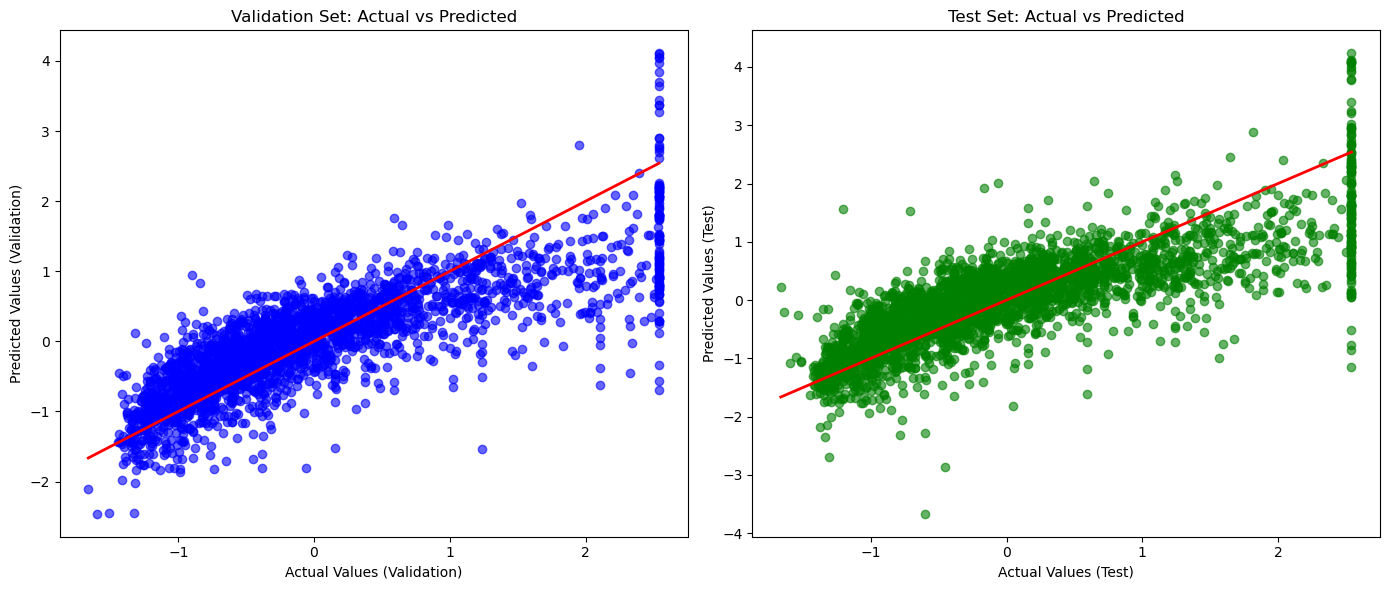

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for Validation Data
plt.figure(figsize=(14, 6))

# Scatter plot for actual vs predicted on validation set
plt.subplot(1, 2, 1)
plt.scatter(y_val, lin_y_val_predict, color='blue', alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)  # Line y=x
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Predicted Values (Validation)')
plt.title('Validation Set: Actual vs Predicted')

# Plot for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, lin_y_test_predict, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line y=x
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()


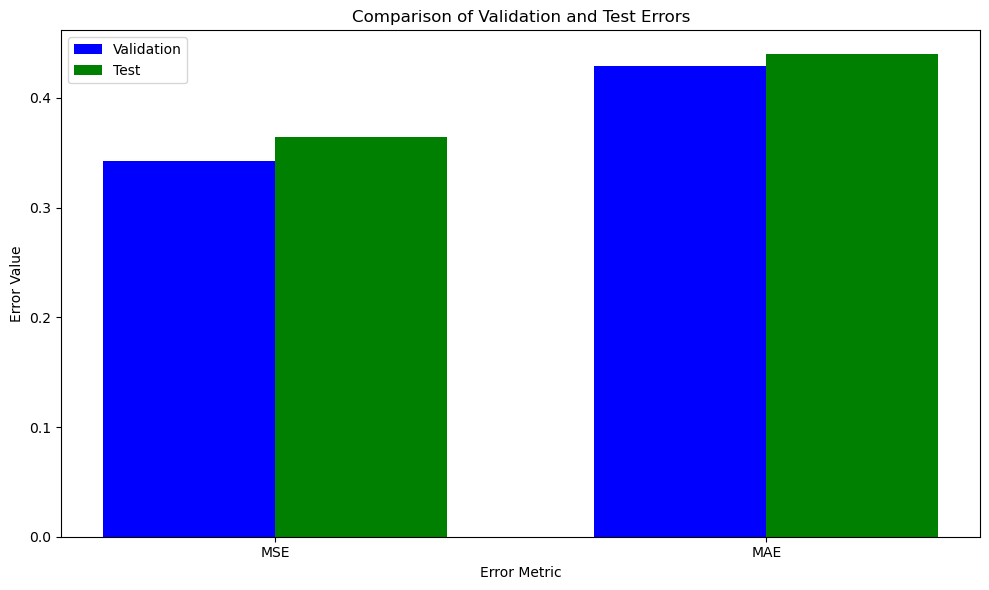

In [21]:
import matplotlib.pyplot as plt

# Store the errors in a dictionary for easy plotting
metrics = ['MSE', 'MAE']
val_errors = [val_error_squared, val_error_absolute]
test_errors = [test_error_squared, test_error_absolute]

# Plot the errors side by side for validation and test sets
plt.figure(figsize=(10, 6))

x = np.arange(len(metrics))  # Number of metrics
width = 0.35  # Width of the bars

# Plot bars for validation errors
plt.bar(x - width/2, val_errors, width, label='Validation', color='blue')

# Plot bars for test errors
plt.bar(x + width/2, test_errors, width, label='Test', color='green')

# Add labels and title
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Comparison of Validation and Test Errors')
plt.xticks(x, metrics)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Ridge 

In [30]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(x_train,y_train)
print(ridge_reg.intercept_,ridge_reg.coef_)
# validation
r_y_val_predict=ridge_reg.predict(x_val)
val_error_squared=mean_squared_error(y_val,r_y_val_predict)
val_error_absolute=mean_absolute_error(y_val,r_y_val_predict)
print(f"\nthe validation MSE is: {val_error_squared}\n the validation MAE is: {val_error_absolute} ")
#testing
r_y_test_predict=ridge_reg.predict(x_test)
test_error_squared=mean_squared_error(y_test,r_y_test_predict)
test_error_absolute=mean_absolute_error(y_test,r_y_test_predict)
print(f"\nthe testing MSE is:{test_error_squared}\n the testing MAE is: {test_error_absolute} ")

-0.0029878786727154764 [ 0.64874919  0.09884991 -0.11282145  0.388461   -0.38255178  0.14733023
 -0.72950054 -0.48860092 -0.1069757  -0.29784877  0.4925844   0.25642056
 -0.2402688 ]

the validation MSE is: 0.3429747196497279
 the validation MAE is: 0.4291681879269136 

the testing MSE is:0.36477156008833655
 the testing MAE is: 0.4396751528420873 


# Lasso

In [31]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)
print(lasso_reg.intercept_,lasso_reg.coef_)
# validation
la_y_val_predict=lasso_reg.predict(x_val)
val_error_squared=mean_squared_error(y_val,la_y_val_predict)
val_error_absolute=mean_absolute_error(y_val,la_y_val_predict)
print(f"\nthe validation MSE is: {val_error_squared}\n the validation MAE is: {val_error_absolute} ")
#testing
la_y_test_predict=lasso_reg.predict(x_test)
test_error_squared=mean_squared_error(y_test,la_y_test_predict)
test_error_absolute=mean_absolute_error(y_test,la_y_test_predict)
print(f"\nthe testing MSE is: {test_error_squared}\n the testing MAE is: {test_error_absolute} ")

-0.004325196430763461 [ 0.53373341  0.0130469   0.          0.         -0.          0.
 -0.         -0.         -0.23944712 -0.         -0.         -0.
 -0.        ]

the validation MSE is: 0.44556201720303495
 the validation MAE is: 0.4929994819521503 

the testing MSE is: 0.44374801663127966
 the testing MAE is: 0.49396384598987064 


# Elastic Net

In [32]:
from sklearn.linear_model import ElasticNet
EN_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
EN_reg.fit(x_train,y_train)
print(EN_reg.intercept_,EN_reg.coef_)
# validation
EN_y_val_predict=EN_reg.predict(x_val)
val_error_squared=mean_squared_error(y_val,EN_y_val_predict)
val_error_absolute=mean_absolute_error(y_val,EN_y_val_predict)
print(f"\nthe validation MSE is: {val_error_squared}\n the validation MAE is: {val_error_absolute} ")
#testing
EN_y_test_predict=EN_reg.predict(x_test)
test_error_squared=mean_squared_error(y_test,EN_y_test_predict)
test_error_absolute=mean_absolute_error(y_test,EN_y_test_predict)
print(f"\nthe testing MSE is: {test_error_squared}\n the testing MAE is: {test_error_absolute} ")

-0.00398531829341851 [ 0.55786278  0.06532102  0.          0.02182844 -0.          0.
 -0.         -0.         -0.25861122 -0.         -0.         -0.
 -0.        ]

the validation MSE is: 0.42704291981755377
 the validation MAE is: 0.48239662512944764 

the testing MSE is: 0.4276889441423619
 the testing MAE is: 0.4846379711559236 


# Stocastic Gradient descent

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss='squared_error', max_iter=1000, learning_rate='optimal', random_state=42)
sgd_reg.fit(x_train,y_train)
#validation
g_y_val_predict=sgd_reg.predict(x_val)
val_error_squared=mean_squared_error(y_val,g_y_val_predict)
val_error_absolute=mean_absolute_error(y_val,g_y_val_predict)
print(f"\nthe validation MSE is: {val_error_squared}\n the validation MAE is: {val_error_absolute} ")
#testing
g_y_test_predict=sgd_reg.predict(x_test)
test_error_squared=mean_squared_error(y_test,g_y_test_predict)
test_error_absolute=mean_absolute_error(y_test,g_y_test_predict)
print(f"\nthe testing MSE is: {test_error_squared}\n the testing MAE is: {test_error_absolute} ")


the validation MSE is: 0.3885506494599888
 the validation MAE is: 0.4640794435887318 

the testing MSE is: 0.4161248953457914
 the testing MAE is: 0.4796039405520546 
